# Packages

In [1]:
# Helpful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
import split_vectorize
import base_models
import neural_nets

from IPython.display import display, HTML

# Get Data

In [2]:
# Uncomment the line below to create a new data file. Otherwise, skip to the next cell to import the existing file.
#%run parse_corpus.py 10000 # Number of articles to get

In [3]:
df = pd.read_csv('data/nyt_corpus.csv')
df.shape

(10000, 32)

### Possible Model Outputs

In [4]:
# pct nulls for each possible labels
(df.shape[0] - df[['desk','general_descriptor','online_sections','taxonomic_classifier']].count()) / df.shape[0]

desk                    0.0041
general_descriptor      0.2140
online_sections         0.0244
taxonomic_classifier    0.0144
dtype: float64

# Preprocess Data

In [5]:
# Uncomment the line below to run pre-processing on the parsed data file.
# Otherwise, skip to the next cell to import the existing preprocessed file.
#%run preprocessing.py

Imported data file
Cleaned 1000 entries in full_text
Cleaned 2000 entries in full_text
Cleaned 3000 entries in full_text
Cleaned 4000 entries in full_text
Cleaned 5000 entries in full_text
Cleaned 6000 entries in full_text
Cleaned 7000 entries in full_text
Cleaned 8000 entries in full_text
Cleaned 9000 entries in full_text
Cleaned 10000 entries in full_text
Cleaned full_text
Cleaned 1000 entries in lead_paragraph
Cleaned 2000 entries in lead_paragraph
Cleaned 3000 entries in lead_paragraph
Cleaned 4000 entries in lead_paragraph
Cleaned 5000 entries in lead_paragraph
Cleaned 6000 entries in lead_paragraph
Cleaned 7000 entries in lead_paragraph
Cleaned 8000 entries in lead_paragraph
Cleaned 9000 entries in lead_paragraph
Cleaned 10000 entries in lead_paragraph
Cleaned lead_paragraph
Cleaned 1000 entries in headline
Cleaned 2000 entries in headline
Cleaned 3000 entries in headline
Cleaned 4000 entries in headline
Cleaned 5000 entries in headline
Cleaned 6000 entries in headline
Cleaned 70

In [5]:
df_final = pd.read_csv('data/nyt_corpus_cleaned.csv')
print(df_final.shape)
df_final.head()

(10000, 6)


,desk,full_text,lead_paragraph,headline,nouns,lemmas
0,business & financial,"the bethlehem steel corporation , after report...","the bethlehem steel corporation , after report...",bethlehem halts dividends and plans cuts after...,bethlehem steel corporation loss quarter yeste...,"the bethlehem steel corporation , after report..."
1,foreign,seeking to raise morale at home and improve it...,seeking to raise morale at home and improve it...,world news briefs ; iraqis elect parliament pr...,morale home image iraq today elections candida...,seek to raise morale at home and improve it im...
2,editorial,by the time lord elgin obtained the authority ...,by the time lord elgin obtained the authority ...,return the parthenon marbles,time lord elgin authority pieces stone inscrip...,by the time lord elgin obtain the authority to...
3,classified,speier - claire . born new york city . age 70....,speier - claire . born new york city . age 70....,"paid notice : deaths speier , claire",claire york city age graduate york university ...,speier - claire . born new york city . age 70....
4,national,lead : the japanese videotape begins with the ...,lead : the japanese videotape begins with the ...,not fit to import ?,lead videotape words tables foods tape inspect...,lead : the japanese videotape begin with the w...


In [30]:
label_transform = pd.concat([df_final.desk, df.desk], axis=1)
label_transform.columns = ['desk_cleaned', 'desk']
label_transform.groupby(['desk_cleaned','desk']).size().reset_index(name='cnt').set_index(['desk_cleaned','desk'])[:20]

cnt
desk_cleaned         desk                                      
a nation challenged  A Nation Challenged                      1
arts & leisure       Arts & Ideas/Cultural Desk              18
                     Arts & Leisure Desk                     29
                     Arts and Leisure Desk                  129
                     Cultural Desk                          231
                     Leisure/Weekend Desk                    56
                     Movies, Performing Arts/Weekend Desk    80
                     Museums                                  1
                     The Arts/Cultural Desk                 219
                     Weekend Desk                           115
                     Weekend DeskWeekend Desk                 4
book review          Book Review Desk                       176
business & financial Business World Magazine                  1
                     Business/Finance Desk                    1
                     Business/Financial Desk                628
                     Business\Financial Desk                  1
                     E-Commerce                               1
                     Financial Desk                        1106
                     Financial Desk;                          2
                     Money and Business/Financial Desk       79

### Train/Dev/Test Split and TF-IDF Vectorize

/Users/carmen/Documents/NLP/w266-final-project/split_vectorize.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = self.df[[self.articles, self.labels]][self.df[self.articles].notnull()][self.df[self.labels].notnull()]


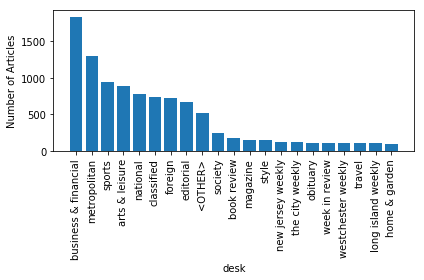

In [15]:
reload(split_vectorize)
rand_seed = 102 # Random number to feed in so all models will assign same articles to train/dev/test sets

# Create object for each of the model inputs
full_text = split_vectorize.SplitVectorize(df_final, 'full_text', 'Full Text')
lead_para = split_vectorize.SplitVectorize(df_final, 'lead_paragraph', 'Lead Paragraph')
headlines = split_vectorize.SplitVectorize(df_final, 'headline', 'Headlines')
nouns = split_vectorize.SplitVectorize(df_final, 'nouns', 'Nouns Only')
lemmas = split_vectorize.SplitVectorize(df_final, 'lemmas', 'Lemmatized')

all_inputs = [full_text, lead_para, headlines, nouns, lemmas]

# Split into train/test data and TF-IDF vectorize
for x in all_inputs:
    x.train_test_split(rand_seed)
    x.tfidf_vectorize()

In [14]:
full_text.df.groupby('desk').count().sum()

full_text    9847
dtype: int64

In [8]:
html = '<table><th>Article Type</th><th>Training Articles</th><th>Training Words</th><th>% Training Words</th>'
html += '<th>Avg. Words per Training Article</th><th>Training Vocab Size</th><th>% Training Vocab</th>'
html += '<th>Avg. Unique Words per Training Article</th><th>Dev Articles</th><th>Test Articles</th></tr>'

for x in all_inputs:
    html += '<tr><td>{}</td><td>{:,}</td><td>{:,}</td>'.format(x.name_, x.tv_train.shape[0], x.train_words_)
    html += '<td>{:.0%}</td><td>{:.0f}</td>'.format(x.train_words_/full_text.train_words_, x.train_avg_words_)
    html += '<td>{:,}</td><td>{:.0%}</td>'.format(x.train_vocab_size_, x.train_vocab_size_/full_text.train_vocab_size_)
    html += '<td>{:,.0f}</td><td>{:,}</td><td>{:,}</td></tr>'.format(x.train_avg_unq_words_, x.tv_dev.shape[0], x.tv_test.shape[0])

html += '</table>'
display(HTML(html))

Full Text,"7,356","5,032,755",100%,684,"87,541",100%,264,513,"1,978"
Lead Paragraph,"7,169","740,321",15%,103,"40,309",46%,61,499,"1,922"
Headlines,"7,459","57,752",1%,8,"11,150",13%,6,516,"2,022"
Nouns Only,"7,459","1,371,922",27%,184,"65,029",74%,112,516,"2,023"
Lemmatized,"7,460","5,120,323",102%,686,"76,109",87%,246,516,"2,024"


# Baseline Models

### Multinomial Naïve Bayes

In [46]:
reload(base_models)
mnb = base_models.MultNB()

for x in all_inputs:
    mnb.test_models(x)

Best Multinomial Naïve Bayes model:
input       Lemmatized
alpha       0.00195312
accuracy    0.71705426
Name: 126, dtype: object


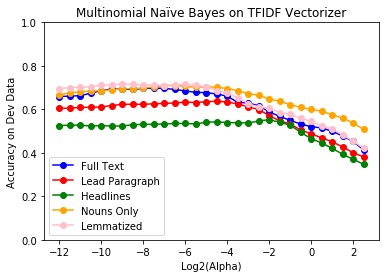

In [47]:
mnb_tables = []
for x in all_inputs:
    mnb_tables.append(x.mnb_accuracy_table_)

mnb.plot_accuracy(mnb_tables)

### Logistic Regression

In [10]:
reload(base_models)
lr = base_models.LogReg()

for x in all_inputs:
    lr.test_models(x)

Best Logistic Regression model:
input         Full Text
penalty              L2
C          100.00000000
accuracy     0.76998051
Name: 23, dtype: object


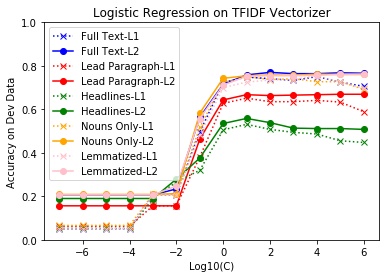

In [11]:
lr_tables = []
for x in all_inputs:
    lr_tables.append(x.lr_accuracy_table_)

lr.plot_accuracy(lr_tables)

In [12]:
html = '<table><th>Model Input</th><th>MNB Parameters</th><th>MNB Accuracy</th>'
html += '<th>LR Parameters</th><th>LR Accuracy</th>'

for x in all_inputs:
    alpha = 'alpha = 2^'+str(np.log2(x.best_mnb_model_.alpha))
    html += '<tr><td>{}</td><td>{}</td><td>{:.3f}</td>'.format(x.name_, alpha, max(x.mnb_accuracy_table_.accuracy))
    C = 'C = 10^'+str(np.log10(x.best_lr_model_.C))
    penalty = 'penalty = '+x.best_lr_model_.penalty
    html += '<td>{}</td><td>{:.3f}</td></tr>'.format(C+'; '+penalty, max(x.lr_accuracy_table_.accuracy))

html += '</table>'
display(HTML(html))

Full Text,alpha = 2^-7.5,0.698,C = 10^2.0; penalty = l2,0.770
Lead Paragraph,alpha = 2^-4.5,0.637,C = 10^5.0; penalty = l2,0.669
Headlines,alpha = 2^-2.0,0.556,C = 10^1.0; penalty = l2,0.558
Nouns Only,alpha = 2^-8.0,0.723,C = 10^4.0; penalty = l2,0.762
Lemmatized,alpha = 2^-6.5,0.698,C = 10^6.0; penalty = l2,0.762


# Complex Models

### Neural Network

In [48]:
reload(neural_nets)
nn = neural_nets.NeuralNets()
nn.load_glove_vectors()

for x in all_inputs:
    nn.tokenize_pad(x)

# Num Tokens:
# Drop 10%: 1238, 138, 11, 381, 1236
# Drop 20%: 1234, 137, 10, 375, 1232

# Padding:
#  90%: 1241,  140, 11,  381, 1236
# 100%: 7555, 5974, 55, 3296, 7556

Created index of 100-dimensional embeddings for 400,000 words.
Full Text:
	99,540 unique tokens
	Created matrix of 100-dimensional weights for 99,541 tokens
	Training data shape: (7356, 1234)
Lead Paragraph:
	44,533 unique tokens
	Created matrix of 100-dimensional weights for 44,534 tokens
	Training data shape: (7169, 137)
Headlines:
	11,432 unique tokens
	Created matrix of 100-dimensional weights for 11,433 tokens
	Training data shape: (7459, 10)
Nouns Only:
	65,825 unique tokens
	Created matrix of 100-dimensional weights for 65,826 tokens
	Training data shape: (7459, 375)
Lemmatized:
	89,513 unique tokens
	Created matrix of 100-dimensional weights for 89,514 tokens
	Training data shape: (7460, 1232)


In [49]:
nn.neural_net(full_text)

Compiled
Epoch 1/5
7356/7356 [==============================] - 16s 2ms/step - loss: 2.4308 - acc: 0.2874
Epoch 2/5
7356/7356 [==============================] - 16s 2ms/step - loss: 1.9028 - acc: 0.4822
Epoch 3/5
7356/7356 [==============================] - 16s 2ms/step - loss: 1.6157 - acc: 0.5495
Epoch 4/5
7356/7356 [==============================] - 16s 2ms/step - loss: 1.4285 - acc: 0.6020
Epoch 5/5
7356/7356 [==============================] - 16s 2ms/step - loss: 1.2749 - acc: 0.6505
Fit
1978/1978 [==============================] - 0s 182us/step
Test loss: 5.115254186643749
Test accuracy: 0.10819009103867837
First prediction (probabilities): [3.6816597e-01 1.8409354e-04 3.5002800e-03 6.9068553e-12 2.5758861e-02
 3.5614166e-02 1.4984674e-02 1.7304564e-04 5.7187933e-04 4.7583836e-01
 4.6099690e-03 8.7665664e-03 1.5217651e-04 9.6027451e-03 1.2069022e-05
 2.3964307e-07 1.3232242e-03 2.7094398e-02 3.5057506e-03 1.7020537e-02
 3.1209930e-03]
First prediction (category): 9
First test lab

In [45]:
nn.neural_net(headlines)

Compiled
Epoch 1/5
7459/7459 [==============================] - 0s 59us/step - loss: 2.1979 - acc: 0.3849
Epoch 2/5
7459/7459 [==============================] - 0s 34us/step - loss: 1.6700 - acc: 0.5270
Epoch 3/5
7459/7459 [==============================] - 0s 36us/step - loss: 1.5435 - acc: 0.5477
Epoch 4/5
7459/7459 [==============================] - 0s 34us/step - loss: 1.4902 - acc: 0.5619
Epoch 5/5
7459/7459 [==============================] - 0s 35us/step - loss: 1.4520 - acc: 0.5707
Fit
2022/2022 [==============================] - 0s 48us/step
Test loss: 5.07985589860337
Test accuracy: 0.06478733926805143
First prediction (probabilities): [2.86900640e-01 9.02035460e-03 3.35148610e-02 2.88708719e-07
 2.58624163e-02 1.45889461e-01 1.34178521e-02 3.19082080e-03
 2.68922700e-03 3.31377983e-01 1.98429730e-03 5.77274337e-03
 2.21231412e-02 1.86650399e-02 3.74859592e-05 2.15433772e-07
 2.87353452e-02 1.33649865e-02 2.25146264e-02 2.13144161e-02
 1.36238802e-02]
First prediction (categor

# Error Analysis

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
for x in [full_text]:#, lead_para, headlines, nouns, lemmas]:
    print('\n', x.name_, ':')
    print(classification_report(x.dev_labels, x.best_mnb_model_.predict(x.tv_dev)))
    print(confusion_matrix(x.dev_labels, x.best_mnb_model_.predict(x.tv_dev), labels=list(x.dev_labels.unique())))

In [ ]:
x.dev_labels.unique()